The chapter is 3800 words in length, in five sections. Let's assume that 1800 of that is code. The remainder is text, and accrues about 4 paragraphs per section. If need be, drop out hubs and authorities which is closely related to network analysis anyhow.

This chapter is an introduction to various linear and non-linear techniques for reducing matrices into an easily visualized form. We highight three examples. One involves information retrieval; one discusses hubs and authories; and one discusses science maps. The science map discussion invites a more extended discussion of linear subspace models and their non-linear counter-parts. 

Here we load in a dictionary of Counters.

In [2]:
import json

fn = 'C:/iPython Notebook/Data/JSON/full_nanoindex_JSON.txt'
with open(fn, encoding = 'UTF-8') as fh:
    corpus = json.load(fh)

Here we load the full text.

In [1]:
import json
from pprint import pprint

with open('Output/nano/full_nano_JSON.txt') as data_file:    
    data = json.load(data_file)

Here we convert the dictionary of Counters to a pandas DataFrame

In [3]:
import pandas as pd

dg = pd.DataFrame.from_dict(corpus, orient='index')
dg=dg.fillna(0)


Here we extract the article ids and words into a list. I have some questions at this point about whether the extracts from the dataframe are morphable.

In [61]:
article_id = list(dg.index.values)
words = list(dg.columns.values)

Here we keep just the most frequent 30 columns.

In [74]:
column_sum = dg.sum(axis=0)
column_sum.sort(ascending=False)
top_30 = column_sum[0:30]
dg_top30 = dg[top_30.index]
dg_top10.ix[0:5, :]

,all_others,stopwords,use,nanotechnolog,nanoparticl,applic,develop,system,effect,cell
WOS:000070991500004,2,1,0,0,0,0,0,0,0,0
WOS:000071136700022,55,79,4,1,0,1,1,0,0,0
WOS:000071326100020,2,2,0,1,0,0,0,0,0,0
WOS:000071380900046,99,88,1,0,0,0,0,0,0,0
WOS:000071393800011,50,52,2,1,0,0,0,0,0,0


#7.1 Latent Semantic Indexing

Here we discuss the famous AT&T approach, the classic information retrieval approach. We also introduce SVD, and lossy compression. We also seed the ideas of transformation.

The first step is to actually do and time the SVD.

In [4]:
import scipy.sparse.linalg as sp

x = dg.as_matrix()
import time
a = time.time()
U, W, V = sp.svds(x,k=200)
b = time.time()
c = b-a
print(c)

120.29487991333008


We now create three dataframes to store the result. This requires first making an index on the reduced data, the factors.

In [7]:
factor_index = []

for i in range(200):
    factors = 'Factor '+str(i)
    factor_index.append(factors)
    
print(factor_index)

['Factor 0', 'Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Factor 8', 'Factor 9', 'Factor 10', 'Factor 11', 'Factor 12', 'Factor 13', 'Factor 14', 'Factor 15', 'Factor 16', 'Factor 17', 'Factor 18', 'Factor 19', 'Factor 20', 'Factor 21', 'Factor 22', 'Factor 23', 'Factor 24', 'Factor 25', 'Factor 26', 'Factor 27', 'Factor 28', 'Factor 29', 'Factor 30', 'Factor 31', 'Factor 32', 'Factor 33', 'Factor 34', 'Factor 35', 'Factor 36', 'Factor 37', 'Factor 38', 'Factor 39', 'Factor 40', 'Factor 41', 'Factor 42', 'Factor 43', 'Factor 44', 'Factor 45', 'Factor 46', 'Factor 47', 'Factor 48', 'Factor 49', 'Factor 50', 'Factor 51', 'Factor 52', 'Factor 53', 'Factor 54', 'Factor 55', 'Factor 56', 'Factor 57', 'Factor 58', 'Factor 59', 'Factor 60', 'Factor 61', 'Factor 62', 'Factor 63', 'Factor 64', 'Factor 65', 'Factor 66', 'Factor 67', 'Factor 68', 'Factor 69', 'Factor 70', 'Factor 71', 'Factor 72', 'Factor 73', 'Factor 74', 'Factor 75', 'Factor 76', 'Factor 

This example creates DataFrames out of the matrix decomposition.

In [23]:
uf = pd.DataFrame(U,index=article_id,columns=factor_index)
wf = pd.DataFrame(W,index=factor_index)
V_hat=V.transpose()
vf = pd.DataFrame(V_hat,index=words,columns=factor_index)
wf.head()

,0
Factor 0,70.240523
Factor 1,70.406503
Factor 2,70.643714
Factor 3,70.701703
Factor 4,70.767213


In [17]:
vf.head()

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,...,Factor 190,Factor 191,Factor 192,Factor 193,Factor 194,Factor 195,Factor 196,Factor 197,Factor 198,Factor 199
novel,-0.112684,-0.041652,-0.082223,-0.071644,0.067857,-0.016993,-0.003238,0.017959,0.045467,-0.100616,...,0.011290,-0.036145,-0.015277,0.003142,-0.023992,-0.010732,-0.030208,-0.003968,0.001566,-0.001855
show,-0.020358,-0.000561,0.033720,0.007178,0.010750,-0.009599,0.006919,-0.001989,-0.003514,0.000853,...,-0.042233,0.031103,0.000310,-0.013058,0.046504,-0.021180,0.060074,-0.041286,0.002359,-0.003431
biosens,-0.002913,0.006312,0.000809,-0.001090,-0.004185,0.000468,0.001880,0.004295,0.001142,-0.003102,...,0.001133,-0.002502,0.001774,0.001308,-0.004446,-0.002541,0.000348,0.000436,0.000000,-0.000089
detect,0.029677,-0.026348,-0.002902,-0.000815,-0.002702,0.009257,0.030091,-0.006229,0.016885,0.072953,...,0.053887,0.025844,0.047054,-0.018539,-0.053416,-0.020543,-0.012715,-0.011384,0.001233,-0.001863
effects,0.005125,-0.006475,-0.008828,0.001400,-0.003518,-0.001776,0.002981,0.013081,-0.001499,-0.005631,...,-0.021518,0.005186,0.001407,-0.005591,0.015550,0.003547,0.007408,-0.010706,-0.000532,-0.000470


In [105]:
uf.head()
uf['Factor 0']

WOS:000070991500004    0.000812
WOS:000071136700022   -0.006656
WOS:000071326100020   -0.000374
WOS:000071380900046    0.005570
WOS:000071393800011   -0.002333
WOS:000071543800001   -0.000170
WOS:000071543800041    0.002349
WOS:000071585100004   -0.000973
WOS:000071661300002   -0.007097
WOS:000071904500005   -0.001824
WOS:000072056500001    0.004637
WOS:000072115900013   -0.004129
WOS:000072168800001   -0.000700
WOS:000072217300005    0.007458
WOS:000072232400001    0.001442
...
WOS:A1997XT17300003    0.000186
WOS:A1997XT17300008    0.003517
WOS:A1997XW34300066   -0.006466
WOS:A1997XW78300002   -0.018782
WOS:A1997XW78300003    0.000850
WOS:A1997XW78300004    0.001539
WOS:A1997YA68200001    0.005903
WOS:A1997YA92500022   -0.007223
WOS:A1997YB96400004    0.005297
WOS:A1997YD29300005   -0.006774
WOS:A1997YD68700003    0.006811
WOS:A1997YJ38600008   -0.000536
WOS:A1997YK13500035   -0.004904
WOS:A1997YK34600009    0.002388
WOS:A1998YH99000014   -0.001933
Name: Factor 0, Length: 27122, dtype

We now save these to file for future use.

In [130]:
## Save the SVD data frames to file
import json

with open('Output/nano/SVDU_JSON.txt', 'w') as fp:
    json.dump(uf.to_json(), fp)

with open('Output/nano/SVDW_JSON.txt', 'w') as fp:
    json.dump(wf.to_json(), fp)

with open('Output/nano/SVDW_JSON.txt', 'w') as fp:
    json.dump(vf.to_json(), fp)

These dataframes constitute a latent semantic index of the data. We can do a lot of interesting things with this data. In this example we look for synonyms and antonyms of "useful" and "applied."  We also seek out particular articles which represent applied work with nanotubes. And we seek out particular journals which are more theoretical in character. 

In [227]:
#144 for nanotechnolog(y)
#322 for us(e)
#4 for appl(ication)
# Here we see stemmed words
from nltk.stem.porter import *

query1 = "use uses using application useful commercialization"
query2 = "nanotubes"
query3 = "basic fundamental research"

stemmer = PorterStemmer()
vector = {}
output = pd.DataFrame([])
output.head()

for n,query in enumerate([query1, query2, query3]):

    for word in query.split(" "):
        w = word.lower()
        w= stemmer.stem(w)
        index_nano = words.index(w)
        x=vf.ix[w]
        #output.head()
        output=output.append(x,ignore_index=False)

output=output.drop_duplicates()
output

processing element 0
processing element 1
processing element 2
<class 'pandas.core.frame.DataFrame'>


,Factor 0,Factor 1,Factor 10,Factor 100,Factor 101,Factor 102,Factor 103,Factor 104,Factor 105,Factor 106,...,Factor 90,Factor 91,Factor 92,Factor 93,Factor 94,Factor 95,Factor 96,Factor 97,Factor 98,Factor 99
use,-0.021747,0.014501,0.010138,-0.008932,0.006723,0.009282,-0.002790,-0.018414,-0.006778,0.016527,...,-0.001136,0.008745,-0.003863,-0.000164,-0.007518,0.002967,0.008741,0.002746,-0.002286,0.000165
applic,0.015390,-0.005043,0.000578,-0.007894,0.006833,0.000582,0.016254,0.029065,-0.008612,0.030659,...,0.045328,0.002852,0.016987,-0.007532,-0.026063,-0.005312,-0.015309,0.036283,0.017412,-0.007373
commerci,0.013982,-0.002309,-0.008880,-0.001314,0.011188,0.001777,-0.006450,-0.004472,0.001788,0.000315,...,-0.012727,0.003634,-0.004646,-0.004750,-0.007312,-0.007347,-0.008914,-0.005158,-0.004950,-0.004759
nanotub,0.004694,0.052639,-0.079591,-0.078434,-0.012701,0.029271,-0.020491,0.034346,0.002376,-0.009280,...,0.006362,0.012325,-0.019296,-0.019143,-0.045743,0.010888,0.015010,-0.041470,0.083363,0.029064
basic,-0.004997,-0.004497,-0.000843,0.005956,-0.009341,0.005634,-0.004346,0.010688,-0.002761,0.001830,...,0.006262,-0.000288,-0.008438,0.000424,0.010624,-0.003810,-0.007221,0.002302,-0.004685,0.013244
fundament,-0.009325,-0.000757,0.008034,0.002130,-0.010534,0.004225,-0.013631,0.005127,0.001536,0.007879,...,0.012182,-0.002655,-0.009304,0.002094,0.012959,0.002875,0.005029,0.007916,-0.004282,0.010137
research,-0.009220,0.001606,0.016793,-0.010503,-0.000553,0.032998,0.000404,0.029837,0.019012,-0.022031,...,0.041235,0.046229,-0.030463,0.050428,-0.003260,0.010288,-0.002857,-0.013395,-0.001175,0.026721


In [233]:
weight = pd.DataFrame(pd.Series([1,1,1,0,-1,-1,-1],index=output.index.values))
weight.shape

(7, 1)

In [234]:
output_t = output.T
output_t.shape

(200, 7)

In [256]:
applied_vector = output_t.dot(weight)
applied_vector.shape

(200, 1)

In [283]:
vf.shape
applied_words = vf.dot(applied_vector)
df1=applied_words.sort([0],ascending=False)
df1.head()

,0
use,0.988010
applic,0.912007
application,0.140336
applications,0.125584
biomed,0.070515


In [284]:
vf.shape
applied_words = vf.dot(applied_vector)
df2=applied_words.sort([0],ascending=True)
df2.head()

,0
research,-0.976032
physic,-0.067265
nanosci,-0.052685
understand,-0.051612
fund,-0.041084


In [282]:
query4 ='used application applications nanosci'

for n,query in enumerate([query4]):
    print("processing element",n)
    for word in query.split(" "):
        index_nano = words.index(word)
        #print(w)
        #print(index_nano)
        x=vf.ix[word]
        #output.head()
        output=output.append(x,ignore_index=False)
        
output=output.drop_duplicates()
output

processing element 0


,Factor 0,Factor 1,Factor 10,Factor 100,Factor 101,Factor 102,Factor 103,Factor 104,Factor 105,Factor 106,...,Factor 90,Factor 91,Factor 92,Factor 93,Factor 94,Factor 95,Factor 96,Factor 97,Factor 98,Factor 99
use,-0.021747,0.014501,0.010138,-0.008932,0.006723,0.009282,-0.002790,-0.018414,-0.006778,0.016527,...,-0.001136,0.008745,-0.003863,-0.000164,-0.007518,0.002967,0.008741,0.002746,-0.002286,0.000165
applic,0.015390,-0.005043,0.000578,-0.007894,0.006833,0.000582,0.016254,0.029065,-0.008612,0.030659,...,0.045328,0.002852,0.016987,-0.007532,-0.026063,-0.005312,-0.015309,0.036283,0.017412,-0.007373
commerci,0.013982,-0.002309,-0.008880,-0.001314,0.011188,0.001777,-0.006450,-0.004472,0.001788,0.000315,...,-0.012727,0.003634,-0.004646,-0.004750,-0.007312,-0.007347,-0.008914,-0.005158,-0.004950,-0.004759
nanotub,0.004694,0.052639,-0.079591,-0.078434,-0.012701,0.029271,-0.020491,0.034346,0.002376,-0.009280,...,0.006362,0.012325,-0.019296,-0.019143,-0.045743,0.010888,0.015010,-0.041470,0.083363,0.029064
basic,-0.004997,-0.004497,-0.000843,0.005956,-0.009341,0.005634,-0.004346,0.010688,-0.002761,0.001830,...,0.006262,-0.000288,-0.008438,0.000424,0.010624,-0.003810,-0.007221,0.002302,-0.004685,0.013244
fundament,-0.009325,-0.000757,0.008034,0.002130,-0.010534,0.004225,-0.013631,0.005127,0.001536,0.007879,...,0.012182,-0.002655,-0.009304,0.002094,0.012959,0.002875,0.005029,0.007916,-0.004282,0.010137
research,-0.009220,0.001606,0.016793,-0.010503,-0.000553,0.032998,0.000404,0.029837,0.019012,-0.022031,...,0.041235,0.046229,-0.030463,0.050428,-0.003260,0.010288,-0.002857,-0.013395,-0.001175,0.026721
used,0.140189,-0.125418,-0.067104,0.040228,-0.016988,0.010000,0.000887,0.022035,0.019989,-0.005031,...,0.016978,-0.043565,-0.002139,-0.006648,0.004154,0.023411,-0.021273,0.035861,-0.011142,-0.007369
application,-0.005364,-0.000517,0.013256,-0.005357,0.003969,0.004958,0.005458,0.008822,0.004083,0.005356,...,0.003834,0.006445,0.007197,-0.007591,0.011243,-0.014930,-0.004935,0.021526,0.013170,0.002185
applications,0.009679,0.007867,0.011725,0.008763,0.005884,0.001288,0.006377,0.010314,-0.004019,0.006263,...,-0.002019,0.010012,0.001953,0.009144,-0.004154,0.006340,-0.010401,0.004725,0.001724,-0.003607


In [323]:
# Find the new applied vector and normalize
weight = pd.DataFrame(pd.Series([1,1,1,0,-1,-1,-1,1,1,1,1],index=output.index.values))
output_t = output.T
applied_vector = output_t.dot(weight)
l1 = applied_vector.T.dot(applied_vector)
l1=l1.apply(np.sqrt) 
applied_vector = applied_vector.divide(l1[0],axis='columns')
applied_vector.size

# Find the new nanotube vector and normalize
weight = pd.DataFrame(pd.Series([0,0,0,1,0,0,0,0,0,0,0],index=output.index.values))
output_t = output.T
nanotube_vector = output_t.dot(weight)
l2 = nanotube_vector.T.dot(nanotube_vector)
l2=l2.apply(np.sqrt) 
nanotube_vector = nanotube_vector.divide(l2[0],axis='columns')

# add together to get applied nanotube research
# subtract to get theoretical nanotube research
applied_research = applied_vector+nanotube_vector
pure_research = nanotube_vector-applied_vector

                   0
Factor 0    0.085537
Factor 1   -0.050327
Factor 10  -0.040089
Factor 100  0.018577
Factor 101  0.014329
Factor 102 -0.000460
Factor 103  0.013250
Factor 104  0.011039
Factor 105 -0.012760
Factor 106  0.035483
Factor 107  0.022469
Factor 108  0.012544
Factor 109  0.027587
Factor 11   0.049547
Factor 110  0.003587
Factor 111  0.021257
Factor 112  0.039345
Factor 113 -0.007323
Factor 114 -0.014106
Factor 115 -0.006114
Factor 116  0.028426
Factor 117  0.003391
Factor 118 -0.045634
Factor 119 -0.043249
Factor 12  -0.103283
Factor 120 -0.096932
Factor 121 -0.003222
Factor 122  0.036138
Factor 123  0.046051
Factor 124  0.042773
...              ...
Factor 72  -0.009716
Factor 73   0.020849
Factor 74  -0.025506
Factor 75  -0.011816
Factor 76  -0.003325
Factor 77  -0.007089
Factor 78  -0.024591
Factor 79   0.001861
Factor 8    0.039827
Factor 80   0.023297
Factor 81   0.012741
Factor 82  -0.054023
Factor 83  -0.018503
Factor 84   0.026513
Factor 85   0.009460
Factor 86  -0

Here we find an exemplary example of applied research and pure research. Once we have the article ids we can print and look more closely. 

In [334]:
nanotube_applied = pd.DataFrame()
uf.shape
print(applied_research.shape)
#applied_research.shape
nanotube_applied = uf.dot(applied_research)
#applied_vector
nanotube_applied.head()

df1=nanotube_applied.sort([0],ascending=False)
df1.head()
applied_id=df1.index[0]

df2=nanotube_applied.sort([0],ascending=True)
df2.head()
pure_id=df2.index[0]
print(applied_id,pure_id)

(200, 1)
WOS:000248299200002 WOS:000338536100028


In [343]:
applied_article = data[applied_id]
applied_article_ti = applied_article['TI']
applied_article_ab = applied_article['AB']
print(applied_article_ti)
print(applied_article_ab)
print()

pure_article = data[pure_id]
pure_article_ti = pure_article['TI']
pure_article_ab = pure_article['AB']
print(pure_article_ti)
print(pure_article_ab)


Applications of carbon nanotubes in neurobiology
Background: Carbon nanotubes are one of the most promising materials for the electronics, computer and aerospace industries. There are numerous properties of carbon nanotubes that make them attractive for applications in neurobiology: small size, flexibility, strength, inertness, electrical conductivity and ease of modification with biological compounds. Objective/Methods: Here, we discuss the current applications of carbon nanotubes in neuroscience. Results: Carbon nanotubes and their derivatives can be used as substrates/scaffolds for neural cell growth. The chemical properties of carbon nanotubes can be systematically varied by attaching different functional groups; manipulation of the charge carried by functionalized carbon nanotubes can be used to control the outgrowth and branching pattern of neuronal processes. The ease with which carbon nanotubes can be patterned makes them attractive for studying the organization of neural netwo

#7.2 Hubs and Authorities

In [ ]:
Here we discuss the "trusted authorities in a hyperlinked environment approach." We also relate it to Coleman centrality. This will be discussed in passing.

#7.3 Linear Subspace Models

Here we plot the first four dimensions of the singular value decomposition.

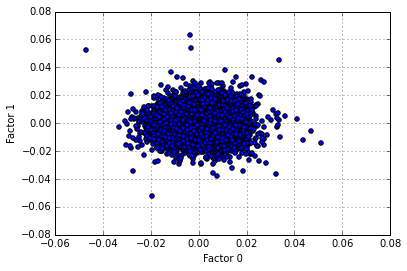

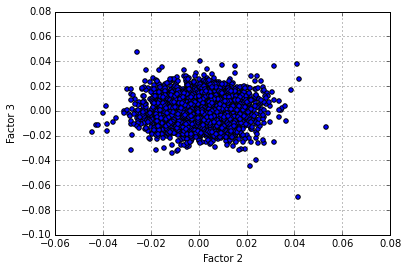

In [119]:
%matplotlib inline
ax=uf.plot(kind='scatter', x='Factor 0', y='Factor 1')
ay=uf.plot(kind='scatter', x='Factor 2', y='Factor 3')

These results are not very satisfactory. A linear subspace model results in relatively few articles being displayed in each dimension.

Here we discuss the presentation of words using MDS. MDS works on distances, attempting to place closely related words together on a page.

In [46]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

corpus_norm = dg.div(dg.sum(axis=1), axis=0)
corpus_mean = corpus_norm.mean()
corpus_true = dg
corpus_true -= corpus_mean
#similarities_articles = euclidean_distances(corpus_true)

# this should be labelled distances 
distances_words = euclidean_distances(corpus_true.transpose())

In [346]:
mds = manifold.MDS(n_components=4, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(distances).embedding_
print(pos)

[[ -1.02306758e+03   2.62071195e+03  -3.23341589e+03   3.60580168e+03]
 [  1.76683076e+03   3.40715680e+03  -2.87855656e+03   1.93404639e+03]
 [  6.59040794e+01  -1.45043850e+02   3.11805641e+01  -2.65088550e+02]
 [  1.18950823e+02  -1.98609022e+02   2.98091478e+02  -2.08128775e+02]
 [  1.22722087e+02  -3.79168024e+02   9.85167115e+01  -1.53323101e+02]
 [  6.08264290e+01  -1.54795941e+02   2.23194296e+02  -2.72647357e+02]
 [  4.74707290e+01  -1.19266819e+02   2.53276308e+02  -1.38130312e+02]
 [ -8.31616202e+01  -2.09212596e+02   2.97384962e+02  -6.61617091e+01]
 [  1.74639184e+00  -2.37635538e+02   1.65438077e+02  -7.52470015e+01]
 [ -1.47562548e+02  -3.30223446e+02   1.40381461e+02  -8.27906261e+01]
 [ -5.06480920e+01  -1.19054410e+02   2.27489999e+02  -3.23306375e+02]
 [ -1.06187325e+02  -2.68106000e+02   8.91345643e+01  -2.66386742e+02]
 [ -1.60350340e+02  -1.66747452e+02   1.87251080e+02  -2.47881538e+02]
 [  3.02293148e+01  -1.94347701e+02   1.52566478e+02  -1.66515972e+02]
 [ -3.

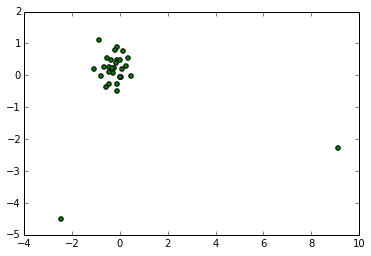

In [124]:
import numpy as np
import matplotlib.pyplot as plt

pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
plt.scatter(pos[:, 2], pos[:, 3], s=20, c='g')
plt.show()

This section potentially discusses principal components analysis, multi-dimensional scaling, correspondence analysis, and factor analysis. This is a more mathematical and scientific discussion where we discuss the minor differences between these techniques in terms of mathematics. We also highlight some alternative implementations of this in scikitlearn or elsewhere.

Here we give a quick shout-out to available routines. Principal Components Analysis is in sklearn.decomposition.PCA. Factor Analysis is in sklearn.decomposition.FactorAnalysis. Multi-Dimensional Scaling is in sklearn.manifold.MDS. Correspondence Analysis is supported in its own package -- MCA. These can also be implemented directly using SVD. 

# 7.4 Non-Linear Subspace Models

This discusses the linear and non-linear distinction and discusses the advantages, disadvantages and trade-offs. The chapter primarily discusses t-Stochastic Neighborhood Embedding (t-SNE). We also mention in passing some of the other techniques like self-organized maps. 

In [15]:
import numpy as np
from sklearn.manifold import TSNE
dg.sort(ascending=False)
dg_norm=dg.div(dg.sum(axis=1), axis=0)
dg_norm=dg_norm.dropna()

In [45]:
print(dg_norm.shape)
dg_norm.head()

(27090, 5001)


,well,rel,laboratori,recognized,research,gain,lithographi,term,recogn,molecular,...,connector,cerium,strip,self-clean,patterning,nnin,beta-sheet,spleen,toxin,stamp
WOS:000070991500004,0,0.000000,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
WOS:000071136700022,0,0.000000,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
WOS:000071326100020,0,0.000000,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
WOS:000071380900046,0,0.000000,0,0,0,0,0,0,0,0.003049,...,0,0,0,0,0,0,0,0,0,0
WOS:000071393800011,0,0.006135,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [48]:
column_sum = dg.sum(axis=0)
column_sum.sort(ascending=False)

dg_norm_sort = dg[column_sum.index]
dg_norm_sort.head()

,all_others,stopwords,use,nanotechnolog,nanoparticl,applic,develop,system,effect,cell,...,isolation,metrology,visualization,silicon carbide,atomic layer deposition,classroom,dye-sensit,probing,green nanotechnology,cells using
WOS:000070991500004,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOS:000071136700022,55,79,4,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOS:000071326100020,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOS:000071380900046,99,88,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOS:000071393800011,50,52,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X = dg_norm.as_matrix()
X_trunc = X[0:5000,0:300]

print(X_trunc.shape)

(5000, 300)


In [69]:
model = TSNE(n_components=2, random_state=0, verbose=1)
pos=model.fit_transform(X_trunc) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.014563
[t-SNE] Error after 83 iterations with early exaggeration: 19.857420
[t-SNE] Error after 172 iterations: 2.187256


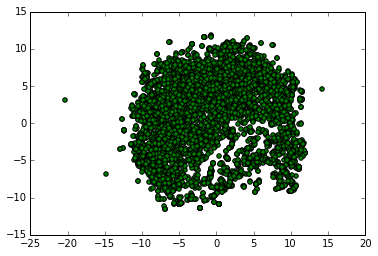

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
plt.show()

In [39]:
print(pos.shape)

(8000, 2)
